# Evaluation of the equilibrium runs
Model output produced by the `equlibrium_run.py` script.

In [71]:
# import section
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

Read the output of the VAS model.

In [24]:
# specify path and read datasets
path = '/Users/oberrauch/work/master/data/eq_runs/hef_eq.nc'
ds = xr.open_dataset(path)
# sort by temperature bias
ds = ds.sortby('temp_bias')
# longtime run (1000 years)
path = '/Users/oberrauch/work/master/data/eq_runs/hef_eq_1e4.nc'
ds_long = xr.open_dataset(path)
# sort by temperature bias
ds_long = ds_long.sortby('temp_bias')

# mass balance data set
path = '/Users/oberrauch/work/master/data/eq_runs/hef_eq_mb.nc'
ds_mb = xr.open_dataset(path)
# sort by temperature bias
ds_mb = ds_mb.sortby('temp_bias')

Define some colors...

In [25]:
# define color cycles
vas_cycle = np.array(['#3D348B', '#6DAEDB', '#FFAE03', '#FB6107', '#1B5299', '#3C1518'])
fl_cycle = np.array(['#12130F', '#426A5A', '#BF3B2F', '#7FB685', '#F2C57C', '#2B2D42'])


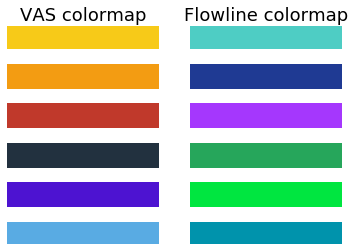

In [26]:
# define color cycles
vas_cycle = np.array(['#f7ca18', '#f39c12', '#c0392b', '#22313f', '#4d13d1', '#59abe3'])
fl_cycle = np.array(["#4ecdc4", "#1f3a93", "#a537fd", "#26a65b", "#00e640", "#0093ac"])
             
fig, ax = plt.subplots(1,2)
for i in np.arange(vas_cycle.size):
    ax[0].axhline(i, c=vas_cycle[i], lw='25')
    ax[1].axhline(i, c=fl_cycle[i], lw='25')

ax[0].set_title('VAS colormap', fontsize=18)
ax[1].set_title('Flowline colormap', fontsize=18)
    
for ax_ in ax:
    ax_.invert_yaxis()
    ax_.axis('off')

/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide


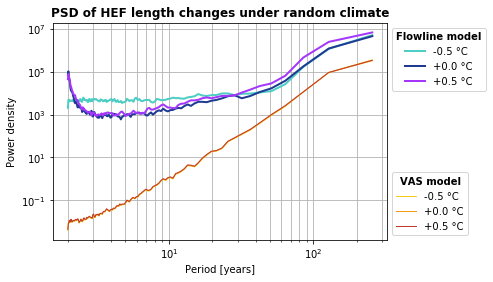

In [73]:
# load module for the spectral analysis
from scipy import signal

fig, ax = plt.subplots(1,1)

for i, b in enumerate(np.sort(ds.temp_bias)):
    # select values by temperature bias
    ds_tmp = ds_long.sel(temp_bias=b, normalized=False, mb_model='random').length

    # compute the power of the signel per frequency band
    sig = ds_tmp.sel(model='fl').values.flatten()
    freqs, psd = signal.welch(sig)
    # convert frequency into periods
    periods = 1/freqs
    ax.loglog(periods, psd, label='{:+.1f} °C'.format(b), c=fl_cycle[i], lw=2)

for i, b in enumerate(np.sort(ds.temp_bias)):
    # select values by temperature bias
    ds_tmp = ds_long.sel(temp_bias=b, normalized=False, mb_model='random').length
    
    # compute the power of the signel per frequency band
    sig = ds_tmp.sel(model='vas').values.flatten()
    freqs, psd = signal.welch(sig)
    # convert frequency into periods
    periods = 1/freqs
    ax.loglog(periods, psd, label='{:+.1f} °C'.format(b), c=vas_cycle[i], lw=1)
    
# get legend handles and labels
handles, labels = ax.get_legend_handles_labels()
# add a seperate legend for each model
leg_fl = ax.legend(handles[:3], labels[:3], bbox_to_anchor=(1, 1), loc='upper left')
leg_fl.set_title('Flowline model', {'weight': 'bold'})
leg_vas = ax.legend(handles[3:], labels[3:], bbox_to_anchor=(1, 0), loc='lower left')
leg_vas.set_title('VAS model', {'weight': 'bold'})
ax.add_artist(leg_fl)

# add grid
ax.grid(which='both')

# title, labels, ...
ax.set_title('PSD of HEF length changes under random climate', {'weight': 'bold'})
ax.set_xlabel('Period [years]')
ax.set_ylabel('Power density')

# store plot
plt.savefig('psd_length_random.pdf', bbox_inches='tight')


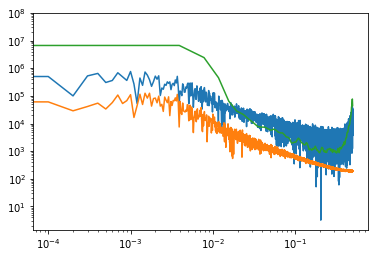

In [85]:
# compute the power of the signel per frequency band
sig = ds_tmp.sel(model='fl').values.flatten()
freqs = np.fft.rfftfreq(sig.size)
Y = np.fft.rfft(sig)
plt.loglog(freqs,np.abs(Y))
sig = ds_tmp.sel(model='vas').values.flatten()
Y = np.fft.rfft(sig)
plt.loglog(freqs, np.abs(Y))

# compute the power of the signel per frequency band
sig = ds_tmp.sel(model='fl').values.flatten()
freqs, psd = signal.welch(sig)
plt.plot(freqs, psd)

In [81]:
freqs = np.fft.rfftfreq(sig.size)

array([0.00000000e+00, 9.99900010e-05, 1.99980002e-04, ...,
       4.99750025e-01, 4.99850015e-01, 4.99950005e-01])

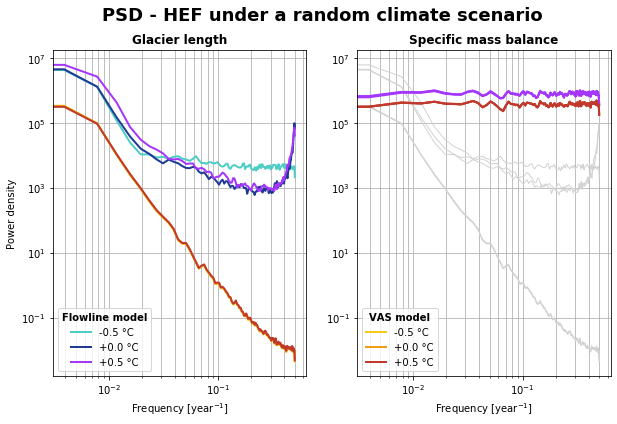

In [68]:
# load module for the spectral analysis
from scipy import signal

fig, ax = plt.subplots(1,2, figsize=[10,6])

# select left subplot

for i, b in enumerate(np.sort(ds.temp_bias)):
    # select values by temperature bias
    ds_tmp = ds_long.sel(temp_bias=b, normalized=False, mb_model='random').isel(time=slice(1000,10000)).length
    
    # compute the power of the signel per frequency band
    sig = ds_tmp.sel(model='fl').values.flatten()
    freqs, psd = signal.welch(sig)
    ax[0].loglog(freqs, psd, label='{:+.1f} °C'.format(b), c=fl_cycle[i], lw=2)
    ax[1].loglog(freqs, psd, label='{:+.1f} °C'.format(b), c='lightgrey', lw=1)

for i, b in enumerate(np.sort(ds.temp_bias)):
    # select values by temperature bias
    ds_tmp = ds_long.sel(temp_bias=b, normalized=False, mb_model='random').isel(time=slice(1000,10000)).length
    
    # compute the power of the signel per frequency band
    sig = ds_tmp.sel(model='vas').values.flatten()
    freqs, psd = signal.welch(sig)
    ax[0].loglog(freqs, psd, label='{:+.1f} °C'.format(b), c=vas_cycle[i], lw=2)
    ax[1].loglog(freqs, psd, label='{:+.1f} °C'.format(b), c='lightgrey', lw=1)
    
for b in ds_mb.temp_bias:
    # select values by temperature bias
    ds_tmp = ds_mb.sel(temp_bias=b).isel(year=slice(1000,10000)).spec_mb
    
    # compute the power of the signel per frequency band
    sig = ds_tmp.sel(model='fl').values.flatten()
    freqs, psd = signal.welch(sig)
    ax[1].loglog(freqs, psd, label='{} °C'.format(b), c=fl_cycle[i], lw=2)
    # compute the power of the signel per frequency band
    sig = ds_tmp.sel(model='vas').values.flatten()
    freqs, psd = signal.welch(sig)
    ax[1].loglog(freqs, psd, label='{} °C'.format(b), c=vas_cycle[i], lw=2)

    
# get legend handles and labels
handles, labels = ax[0].get_legend_handles_labels()
# add a seperate legend for each model
leg_fl = ax[0].legend(handles[:3], labels[:3], loc='lower left')
leg_fl.set_title('Flowline model', {'weight': 'bold'})
leg_vas = ax[1].legend(handles[3:], labels[3:], loc='lower left')
leg_vas.set_title('VAS model', {'weight': 'bold'})

# add grid
ax[0].grid(which='both')
ax[1].grid(which='both')

# title, labels, ...
ax[0].set_title('Glacier length', {'weight': 'bold'})
ax[1].set_title('Specific mass balance', {'weight': 'bold'})
ax[0].set_xlabel('Frequency [year$^{-1}$]')
ax[1].set_xlabel('Frequency [year$^{-1}$]')
ax[0].set_ylabel('Power density')

# 
fig.suptitle('PSD - HEF under a random climate scenario', weight='bold', fontsize=18)

# store plot
plt.savefig('psd_length_mb_random.pdf', bbox_inches='tight')

In [11]:
# mass balance data set
path = '/Users/oberrauch/work/master/data/eq_runs/hef_eq_mb_fl.nc'
ds_mb = xr.open_dataset(path)
# sort by temperature bias
ds_mb = ds_mb.sortby('temp_bias')

In [12]:
# compute the power of the signel per frequency band
sig = ds_long.sel(temp_bias=0, normalized=False, mb_model='random', model='fl').length.values.flatten()
freqs, psd = signal.welch(sig)

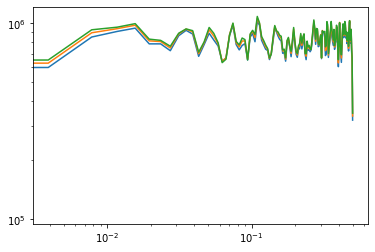

In [13]:
# compute the power of the signel per frequency band
for b in ds_mb.temp_bias:
    sig = ds_mb.sel(temp_bias=b).spec_mb.values.flatten()
    freqs, psd = signal.welch(sig)
    plt.loglog(freqs, psd)

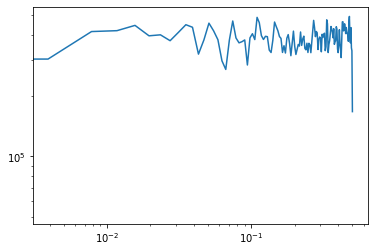

In [8]:
plt.loglog(freqs, psd)

In [213]:
psd[freqs >= 0.1][:-1].mean()

4274.929674469337

(500.0, 6000.0)

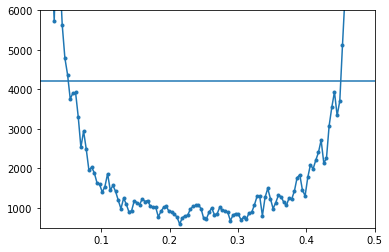

In [217]:
plt.plot(freqs, psd, marker='.')
plt.axhline(4.21831307e+03)
plt.xlim([0.01, 0.5])
plt.ylim([0.5e3, 6e3])

In [16]:
from statsmodels.tsa import stattools

In [21]:
acf_plus = stattools.acf(ds_long.sel(model='fl', mb_model='random', normalized=False, temp_bias=0.5).length, nlags=nlags)
acf_minus = stattools.acf(ds_long.sel(model='fl', mb_model='random', normalized=False, temp_bias=-0.5).length, nlags=nlags)

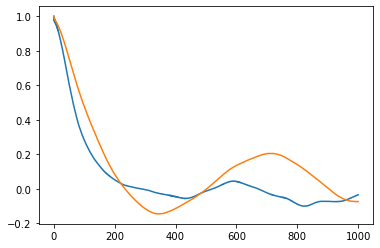

In [23]:
plt.plot(acf_plus)
plt.plot(acf_minus)

(-0.05, 0.05)

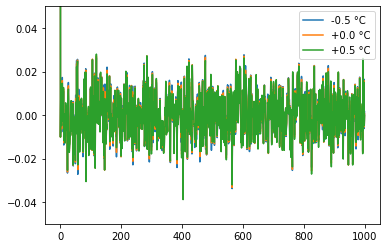

In [23]:
fig, ax = plt.subplots(1,1)

nlags = 1000

for i, b in enumerate(np.sort(ds.temp_bias)):
    # get length data
    length = ds_long.sel(mb_model='random', normalized=False, temp_bias=b).length
    mb = ds_mb.sel(temp_bias=b).spec_mb
    # plot autocorrelation
    #ax.plot(stattools.acf(length.sel(model='fl'), nlags=nlags), c=fl_cycle[i], label='{:+.1f} °C'.format(b))
    
    ax.plot(stattools.acf(mb, nlags=nlags), label='{:+.1f} °C'.format(b))
    
plt.legend()
plt.ylim([-.05, .05])

In [53]:
from statsmodels.tsa import stattools

/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


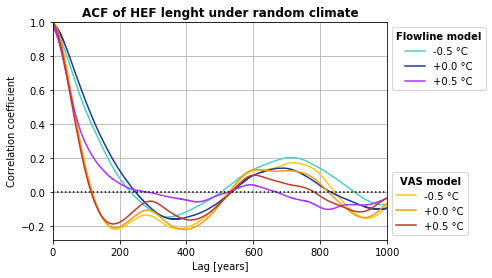

In [55]:
fig, ax = plt.subplots(1,1)

nlags = 1000

for i, b in enumerate(np.sort(ds.temp_bias)):
    # get length data
    length = ds_long.sel(mb_model='random', normalized=False, temp_bias=b).length
    # plot autocorrelation
    ax.plot(stattools.acf(length.sel(model='fl'), nlags=nlags), c=fl_cycle[i], label='{:+.1f} °C'.format(b))
    ax.plot(stattools.acf(length.sel(model='vas'), nlags=nlags), c=vas_cycle[i], label='{:+.1f} °C'.format(b))

# aux line
ax.axhline(0, c='k', ls=':')
# adjust axes
ax.set_xlim([0, nlags])
ylim = ax.get_ylim()
ax.set_ylim([min(ylim), 1])
# add grid
ax.grid()

# get legend handles and labels
handles, labels = ax.get_legend_handles_labels()
# add a seperate legend for each model
leg_fl = ax.legend(handles[::2], labels[::2], bbox_to_anchor=(1, 1), loc='upper left')
leg_fl.set_title('Flowline model', {'weight': 'bold'})
leg_vas = ax.legend(handles[1::2], labels[1::2], bbox_to_anchor=(1, 0), loc='lower left')
leg_vas.set_title('VAS model', {'weight': 'bold'})
ax.add_artist(leg_fl)

# labels, title, ...
ax.set_title('ACF of HEF lenght under random climate', {'weight': 'bold'})
ax.set_xlabel('Lag [years]')
ax.set_ylabel('Correlation coefficient')

# store plot
plt.savefig('acf_length_random.pdf', bbox_inches='tight')

#plt.xlim([0, 200])

/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


(0, 300)

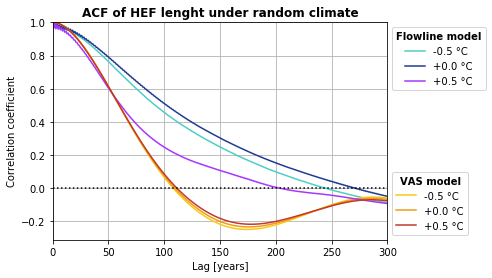

In [70]:
fig, ax = plt.subplots(1,1)

nlags = 1000

for i, b in enumerate(np.sort(ds.temp_bias)):
    # get length data
    length = ds_long.sel(mb_model='random', normalized=False, temp_bias=b).length
    # plot autocorrelation
    ax.plot(stattools.acf(length.sel(model='fl').isel(time=slice(1000,10000)), nlags=nlags),
            c=fl_cycle[i], label='{:+.1f} °C'.format(b))
    ax.plot(stattools.acf(length.sel(model='vas').isel(time=slice(1000,10000)), nlags=nlags),
            c=vas_cycle[i], label='{:+.1f} °C'.format(b))

# aux line
ax.axhline(0, c='k', ls=':')
# adjust axes
ax.set_xlim([0, nlags])
ylim = ax.get_ylim()
ax.set_ylim([min(ylim), 1])
# add grid
ax.grid()

# get legend handles and labels
handles, labels = ax.get_legend_handles_labels()
# add a seperate legend for each model
leg_fl = ax.legend(handles[::2], labels[::2], bbox_to_anchor=(1, 1), loc='upper left')
leg_fl.set_title('Flowline model', {'weight': 'bold'})
leg_vas = ax.legend(handles[1::2], labels[1::2], bbox_to_anchor=(1, 0), loc='lower left')
leg_vas.set_title('VAS model', {'weight': 'bold'})
ax.add_artist(leg_fl)

# labels, title, ...
ax.set_title('ACF of HEF lenght under random climate', {'weight': 'bold'})
ax.set_xlabel('Lag [years]')
ax.set_ylabel('Correlation coefficient')

# store plot
plt.savefig('acf_length_random_nospinup.pdf', bbox_inches='tight')

plt.xlim([0, 300])

### Time series

In [74]:
def plot_time_series(ds, var, title='', suptitle=''):
    # plot relative volume change
    fig, [ax0, ax1] = plt.subplots(1, 2, figsize=[10, 5])

    # flowline model
    ds.sel(model='fl')[var].plot(hue='temp_bias', ax=ax0, add_legend=False, color='lightgray', lw=0.5)
    # vas model
    ax0.set_prop_cycle('color', vas_cycle)
    handles_vas = ds.sel(model='vas')[var].plot(hue='temp_bias', ax=ax0, add_legend=False, lw=1)
    labels_vas = ['{:+.1f} °C'.format(bias) for bias in ds.temp_bias.values]
    
    # set axes limits
    ax0.set_xlim([ds.time.min(), ds.time.max()])
    ylim = ax0.get_ylim()
    ax0.set_ylim([ylim[0]*0.5, ylim[1]])
    
    # title, labels, legend
    ax0.set_title('Volume area scaling model')
    ax0.set_xlabel('Years of model evolution')
    ax0.legend(handles_vas, labels_vas, title='Temperature bias',
           bbox_to_anchor=(0.5, 0), loc=8, ncol=3)
    if ds.normalized:
        # add ylabel
        ax0.set_ylabel('Relative {}'.format(var))
        # aux line
        ax0.axhline(1, lw=0.8, ls=':', c='k')
    else:
        # add ylabel
        unit = 'm' if var == 'length' else 'm$^2$' if var == 'area' else 'm$^3$'
        ax0.set_ylabel('Glacier {} [{}]'.format(var, unit))
        # aux line
        ax0.axhline(ds.sel(model='vas')[var].isel(time=0).mean(), lw=0.8, ls=':', c='k')
        
    ax0.grid()

    # vas model
    ds.sel(model='vas')[var].plot(hue='temp_bias', ax=ax1, add_legend=False, color='lightgray', lw=0.5)
    # flowline model
    ax1.set_prop_cycle('color', fl_cycle)
    handles_fl = ds.sel(model='fl')[var].plot(hue='temp_bias', ax=ax1, add_legend=False)
    labels_fl = ['{:+.1f} °C'.format(bias) for bias in ds.temp_bias.values]

    # set axes limits
    ax1.set_xlim([ds.time.min(), ds.time.max()])
    ylim = ax1.get_ylim()
    ax1.set_ylim([ylim[0]*0.5, ylim[1]])

    # title, labels, legend
    ax1.set_title('Flowline model')
    ax1.set_xlabel('Years of model evolution')
    ax1.legend(handles_fl, labels_fl, title='Temperature bias',
           bbox_to_anchor=(0.5, 0), loc=8, ncol=3)
    ax1.yaxis.tick_right()
    ax1.yaxis.set_label_position('right')
    if ds.normalized:
        # add ylabel
        ax1.set_ylabel('Relative {}'.format(var))
        # aux line
        ax1.axhline(1, lw=0.8, ls=':', c='k')
    else:
        # add ylabel
        unit = 'm' if var == 'length' else 'm$^2$' if var == 'area' else 'm$^3$'
        ax1.set_ylabel('Glacier {} [{}]'.format(var, unit))
        # aux line
        ax1.axhline(ds.sel(model='fl')[var].isel(time=0).mean(), lw=0.8, ls=':', c='k')
        
    ax1.grid()

    # add suptitle
    fig.suptitle(suptitle, fontsize=15)

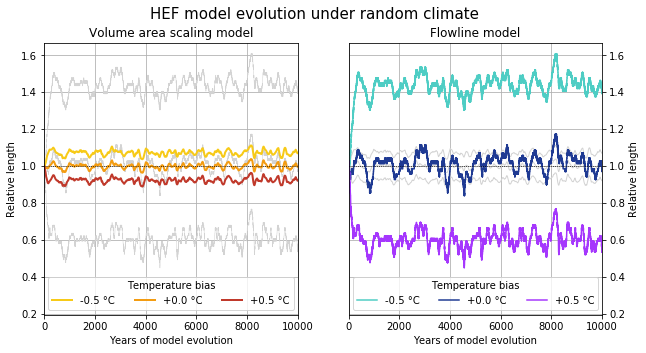

In [70]:
suptitle = 'HEF model evolution under random climate'
plot_time_series(ds_long.sel(mb_model='random', normalized=True),
                 var='length', suptitle=suptitle)
plt.savefig('length_norm_comparison_random.pdf', bbox_inches='tight')

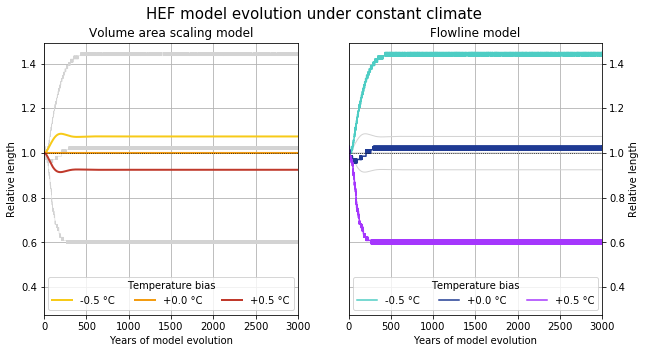

In [71]:
suptitle = 'HEF model evolution under constant climate'
plot_time_series(ds.sel(mb_model='constant', normalized=True),
                 var='length', suptitle=suptitle)
plt.savefig('length_norm_comparison_constant.pdf', bbox_inches='tight')

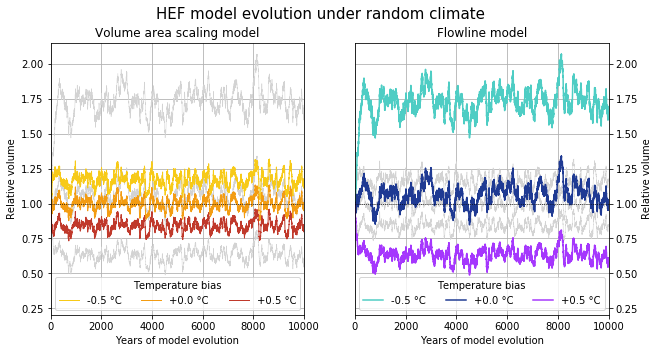

In [75]:
suptitle = 'HEF model evolution under random climate'
plot_time_series(ds_long.sel(mb_model='random', normalized=True),
                 var='volume', suptitle=suptitle)
plt.savefig('volume_norm_comparison_random.pdf', bbox_inches='tight')

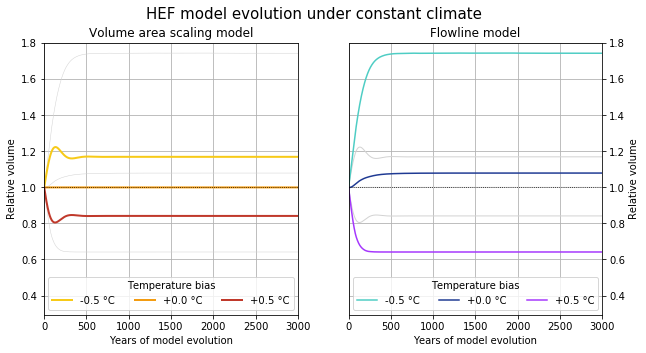

In [73]:
suptitle = 'HEF model evolution under constant climate'
plot_time_series(ds.sel(mb_model='constant', normalized=True),
                 var='volume', suptitle=suptitle)
plt.savefig('volume_norm_comparison_constant.pdf', bbox_inches='tight')

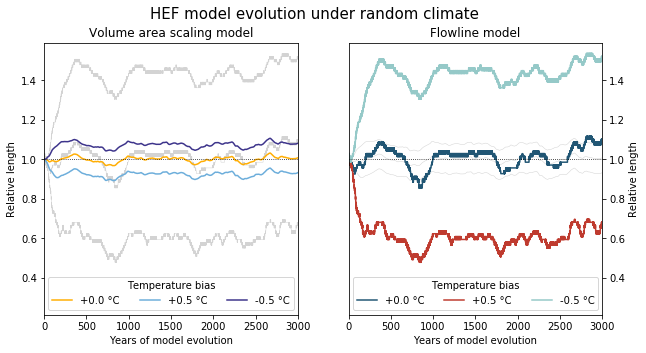

In [13]:
suptitle = 'HEF model evolution under random climate'
plot_time_series(ds_norm, var='length', suptitle=suptitle, normalized=True)
plt.savefig('length_norm_comparison_constant.pdf', bbox_inches='tight')

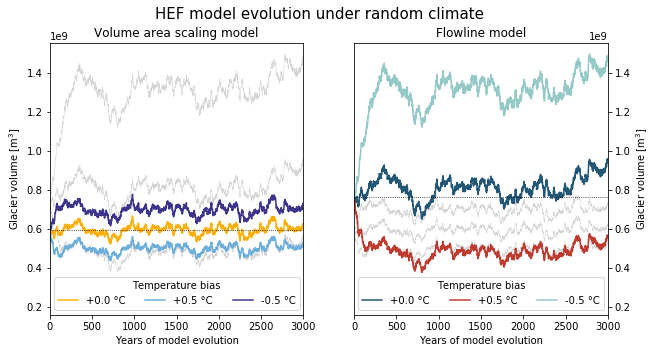

In [14]:
suptitle = 'HEF model evolution under random climate'
plot_time_series(ds, var='volume', suptitle=suptitle, normalized=False)
plt.savefig('volume_comparison_constant.pdf', bbox_inches='tight')

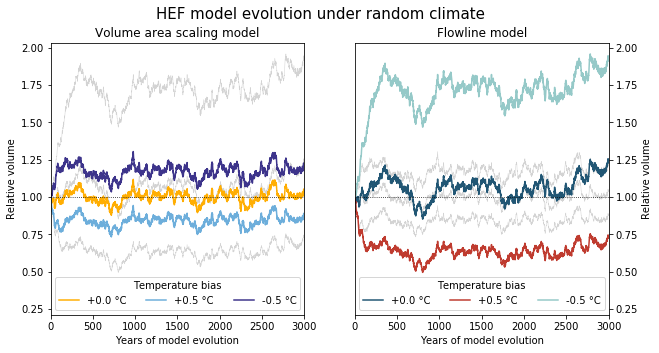

In [15]:
suptitle = 'HEF model evolution under random climate'
plot_time_series(ds_norm, var='volume', suptitle=suptitle, normalized=True)
# save plot to file
plt.savefig('volume_norm_comparison_constant.pdf', bbox_inches='tight')

### Plot time series in one panel

In [16]:
def plot_single_timeseries(ds, title='', ylabel=''):
    """
    """
    # plot relative volume change
    fig, ax = plt.subplots(1, 1, figsize=[7, 5])
    
    # set colors
    ax.set_prop_cycle('color', [vas_cycle[0], fl_cycle[0]])
    [ax.axhline(var_0, ls=':', lw=0.8, c='k') for var_0 in ds.sel(time=0).values]

    # flowline model
    handels = ds.plot(hue='model', add_legend=False)
    
    # labels, title, ...
    ax.set_title(title)
    ax.set_xlabel('Years of model evolution')
    ax.set_ylabel(ylabel)
    ax.legend(handels, ['vas', 'flowline'], title='Evolution model', ncol=2, loc=2)
    # axes
    ax.set_xlim([ds.time.min(), ds.time.max()])

In [474]:
# select single run
temp_bias = 0
# plot relative volume
plot_single_timeseries(ds_norm.volume.sel(temp_bias=temp_bias),
                       ylabel='Relative glacier volume',
                       title='HEF model glacier under random climate')
# add information about temperature bias
ax = plt.gca()
ax.text(0.95, 0.05, 'Temperature bias: {:+.1f} °C'.format(temp_bias),
        ha='right', va='center', transform=ax.transAxes)
# save plot to file
plt.savefig('volume_norm_constant.pdf', bbox_inches='tight')

NameError: name 'plot_single_timeseries' is not defined

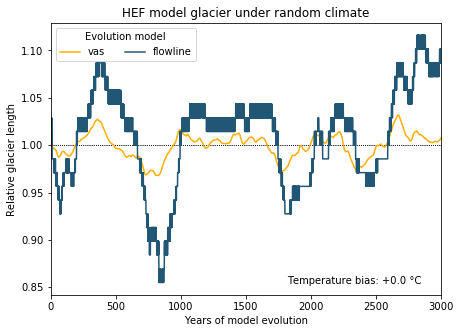

In [19]:
# plot relative length
plot_single_timeseries(ds_norm.length.sel(temp_bias=temp_bias),
                       ylabel='Relative glacier length',
                       title='HEF model glacier under random climate')
# add information about temperature bias
ax = plt.gca()
ax.text(0.95, 0.05, 'Temperature bias: {:+.1f} °C'.format(temp_bias),
        ha='right', va='center', transform=ax.transAxes)
# save plot to file
plt.savefig('length_norm_constant.pdf', bbox_inches='tight')

### Power spectrum

In [26]:
def plot_psd(ds, title=None, suptitle=''):
    
    # load module for the spectral analysis
    from scipy import signal
    
    # prepare labels and titles
    temp_bias = ds.temp_bias.values
    if not title:
        title = np.repeat('', temp_bias.size)
    
    # visualize the results
    n_subplots = len(temp_bias)
    fig, axes = plt.subplots(1, n_subplots, figsize=(10, 6))
    plt.subplots_adjust(wspace=0.05)
    # handle single plot
    axes = np.atleast_1d(axes)
    
    # prepare container for ylims
    ylim = list()

    for i, [b, ax] in enumerate(zip(temp_bias, axes)):
        # select values by temperature bias
        ds_tmp = ds.sel(temp_bias=b).length

        # compute the power of the signel per frequency band
        sig = ds_tmp.sel(model='fl').values.flatten()
        freqs, psd = signal.welch(sig)
        ax.loglog(freqs, psd, label='flowline', c=fl_cycle[0])

        # compute the power of the signel per frequency band
        sig = ds_tmp.sel(model='vas').values.flatten()
        freqs, psd = signal.welch(sig)
        ax.loglog(freqs, psd, label='vas', c=vas_cycle[0])

        ax.set_title(title[i])

        ax.grid(which='both')
        ylim.append(ax.get_ylim())
        # deal with labels
        ax.set_xlabel('Frequency [year$^{-1}$]')
        if i == 0:
            # add ylabel
            ax.set_ylabel('Power')
            # add legend
            ax.legend(loc=3)
        elif i == (axes.size - 1):
            # plot ticks and labels rigth on right panel
            ax.yaxis.tick_right()
            ax.yaxis.set_label_position('right')
            ax.set_ylabel('Power')
        else:
            # remove ytick labels central (all other) pane
            ax.set_yticklabels([])
            
    # set y-limits equal for panel
    ylim = np.array(ylim).flatten()
    for ax in axes:
        ax.set_ylim([min(ylim), max(ylim)])
    
    
    # add suptitle
    fig.suptitle(suptitle, fontsize=15);

In [453]:
def plot_psd_semilog(ds, title=None, suptitle=''):
    
    # load module for the spectral analysis
    from scipy import signal
    
    # visualize the results
    fig, axes = plt.subplots(1, 3, figsize=(10, 6))
    plt.subplots_adjust(wspace=0.05)

    # prepare labels and titles
    temp_bias = ds.temp_bias.values
    if not title:
        title = np.repeat('', temp_bias.size)
    
    # prepare container for axes limits
    xlim = list()
    ylim = list()

    for i, [b, ax] in enumerate(zip(temp_bias, axes)):
        # select values by temperature bias
        ds_tmp = ds.sel(temp_bias=b).length

        # compute the power of the signel per frequency band
        sig = ds_tmp.sel(model='fl').values.flatten()
        freqs, psd = signal.welch(sig)
        ax.semilogy(freqs, psd, label='flowline', c=fl_cycle[0])

        # compute the power of the signel per frequency band
        sig = ds_tmp.sel(model='vas').values.flatten()
        freqs, psd = signal.welch(sig)
        ax.semilogy(freqs, psd, label='vas', c=vas_cycle[0])
        
        # set title
        ax.set_title(title[i])
        
        # get axes limits
        ax.grid(which='both')
        xlim.append(ax.get_xlim())
        ylim.append(ax.get_ylim())
        # deal with labels
        ax.set_xlabel('Repeat period [every X years]')
        if i == 0:
            # add ylabel
            ax.set_ylabel('Power')
            # add legend
            ax.legend(loc=3)
        elif i == (axes.size - 1):
            # plot ticks and labels rigth on right panel
            ax.yaxis.tick_right()
            ax.yaxis.set_label_position('right')
            ax.set_ylabel('Power')
        else:
            # remove ytick labels central (all other) pane
            ax.set_yticklabels([])
            
    # set axes limits equal for panels
    xlim = np.array(xlim).flatten()
    ylim = np.array(ylim).flatten()
    from matplotlib import ticker
    for ax in axes:
        ax.set_xlim([min(xlim), max(xlim)])
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.set_ylim([min(ylim), max(ylim)])
        
    # change xticks from frequency to return period
    for ax in axes:
        xticks = ax.get_xticks()
        xticks = 1/xticks
        #xticks[np.where(np.isinf(xticks))] = 0
        ax.set_xticklabels(['{:.1f}'.format(tick) for tick in xticks])
        
    
    # add suptitle
    fig.suptitle(suptitle, fontsize=15)

/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in true_divide


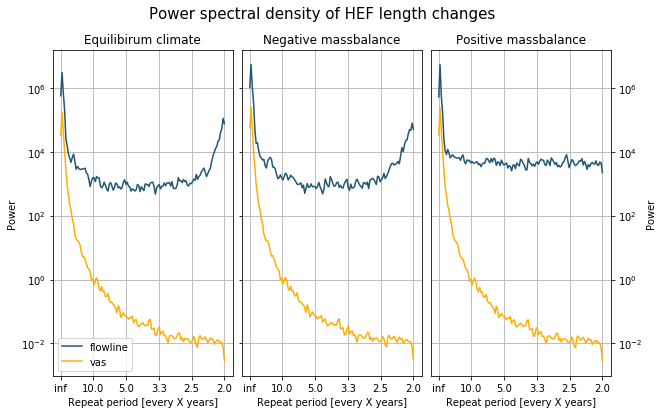

In [454]:
title = ['Equilibirum climate', 'Negative massbalance', 'Positive massbalance']
suptitle = 'Power spectral density of HEF length changes'
plot_psd_semilog(ds.sel(mb_model='random', normalized=False), title=title, suptitle=suptitle)

# save plot to file
plt.savefig('psd_length_random.pdf', bbox_inches='tight')

### Autocorrelation

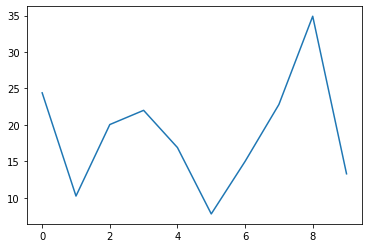

In [413]:
data = np.array([24.40,10.25,20.05,22.00,16.90,7.80,15.00,22.80,34.90,13.30])
plt.plot(data)

(array([-8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8]),
 array([0.24256774, 0.28991447, 0.39091468, 0.4404492 , 0.48819002,
        0.50421044, 0.60974214, 0.76590164, 1.        , 0.76590164,
        0.60974214, 0.50421044, 0.48819002, 0.4404492 , 0.39091468,
        0.28991447, 0.24256774]),
 <matplotlib.lines.Line2D at 0x13e2ad358>)

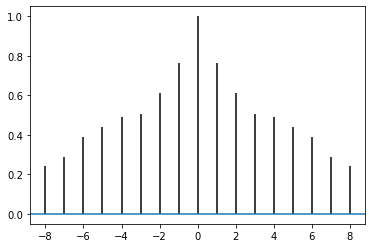

In [418]:
plt.acorr(data, maxlags=8)

In [424]:
sig = tmp.length.values
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

In [425]:
acf = autocorr(sig)

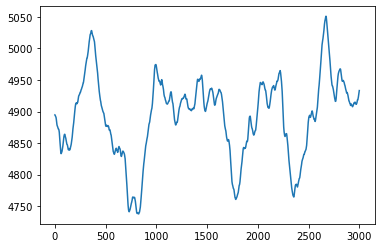

In [429]:
plt.plot(sig)

In [432]:
from statsmodels.tsa import stattools

(400, 500)

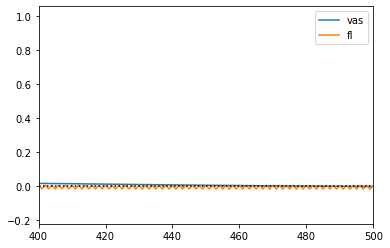

In [452]:
length = ds.sel(mb_model='constant', normalized=True, temp_bias=0.5).length
plt.plot(stattools.acf(length.sel(model='vas'), nlags=1000), label='vas')
plt.plot(stattools.acf(length.sel(model='fl'), nlags=1000, fft=True), label='fl')
plt.axhline(0, c='k', ls=':')
plt.legend()
plt.xlim([400,500])

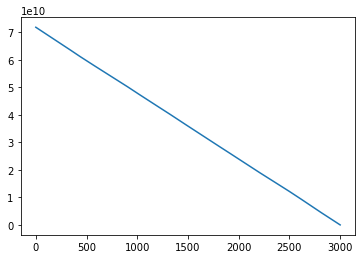

In [426]:
plt.plot(acf)